<a href="https://colab.research.google.com/github/joeDastan/Dog-Cat-Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

This Is A Basic Image Classification On cifar10 Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3479 - loss: 1.7607 - val_accuracy: 0.5523 - val_loss: 1.2653
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5688 - loss: 1.2264 - val_accuracy: 0.5853 - val_loss: 1.1716
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6278 - loss: 1.0548 - val_accuracy: 0.6444 - val_loss: 1.0130
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6676 - loss: 0.9410 - val_accuracy: 0.6649 - val_loss: 0.9644
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6983 - loss: 0.8659 - val_accuracy: 0.6873 - val_loss: 0.9047
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7147 - loss: 0.8016 - val_accuracy: 0.6659 - val_loss: 0.9686
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7391 - loss: 0.7482 - val_accuracy: 0.7013 - val_loss: 0.8630
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7479 - loss: 0.7067 

Now We Try To Train The Model Using Only Cat And Dog Images

--- Data Filtering Complete ---
Original CIFAR-10 Training Set Size: 50000
Filtered Training Set Size (Cats & Dogs): 10000
Filtered Testing Set Size (Cats & Dogs): 2000

--- Training Data Shapes ---
Images Shape: (10000, 32, 32, 3)
Labels Shape: (10000, 1) (Note: Flattened to 1D array)


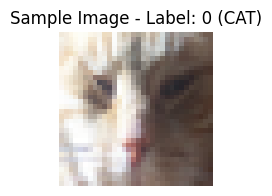

In [7]:

CAT_LABEL_CIFAR10 = 3
DOG_LABEL_CIFAR10 = 5


def filter_cat_dog_data(images, labels):
    cat_indices = np.where(labels.flatten() == CAT_LABEL_CIFAR10)[0]
    dog_indices = np.where(labels.flatten() == DOG_LABEL_CIFAR10)[0]
    combined_indices = np.concatenate([cat_indices, dog_indices])
    filtered_images = images[combined_indices]
    filtered_labels = labels[combined_indices]
    return filtered_images, filtered_labels

# Apply the filter function to both training and testing sets
train_cat_dog_images, train_cat_dog_labels = filter_cat_dog_data(train_images, train_labels)
test_cat_dog_images, test_cat_dog_labels = filter_cat_dog_data(test_images, test_labels)

# Relabel for Binary Classification (0 and 1)
# Cats (original 3) -> 0
# Dogs (original 5) -> 1

def relabel_binary(labels):
    binary_labels = np.copy(labels)
    binary_labels[binary_labels == CAT_LABEL_CIFAR10] = 0
    binary_labels[binary_labels == DOG_LABEL_CIFAR10] = 1
    return binary_labels

train_binary_labels = relabel_binary(train_cat_dog_labels)
test_binary_labels = relabel_binary(test_cat_dog_labels)

# --- 4. Print Summary and Verify ---

print("--- Data Filtering Complete ---")
print(f"Original CIFAR-10 Training Set Size: {len(train_images)}")
print(f"Filtered Training Set Size (Cats & Dogs): {len(train_cat_dog_images)}")
print(f"Filtered Testing Set Size (Cats & Dogs): {len(test_cat_dog_images)}")
print("\n--- Training Data Shapes ---")
print(f"Images Shape: {train_cat_dog_images.shape}")
print(f"Labels Shape: {train_binary_labels.shape} (Note: Flattened to 1D array)")

# Pick a random image to display (e.g., the 50th image)
index = 4888
sample_image = train_cat_dog_images[index]
sample_label = train_binary_labels[index][0]

# Convert binary label back to readable name for display
display_name = "DOG" if sample_label == 1 else "CAT"

plt.figure(figsize=(2,2))
plt.imshow(sample_image)
plt.title(f"Sample Image - Label: {sample_label} ({display_name})")
plt.axis('off')
plt.show()

In [8]:
modelCatDog = models.Sequential()
modelCatDog.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCatDog.add(layers.MaxPooling2D((2, 2)))
modelCatDog.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCatDog.add(layers.MaxPooling2D((2, 2)))
modelCatDog.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCatDog.add(layers.Flatten())
modelCatDog.add(layers.Dense(64, activation='relu'))
modelCatDog.add(layers.Dense(1, activation='sigmoid'))

In [9]:
modelCatDog.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
modelCatDog.compile(optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy'])


In [11]:
historyCatDog = modelCatDog.fit(train_cat_dog_images, train_binary_labels, epochs=10,
                    validation_data=(test_cat_dog_images, test_binary_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5402 - loss: 0.6823 - val_accuracy: 0.6565 - val_loss: 0.6178
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6731 - loss: 0.5968 - val_accuracy: 0.7250 - val_loss: 0.5418
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7223 - loss: 0.5419 - val_accuracy: 0.7390 - val_loss: 0.5172
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7530 - loss: 0.5013 - val_accuracy: 0.7485 - val_loss: 0.5018
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7668 - loss: 0.4696 - val_accuracy: 0.7590 - val_loss: 0.4956
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7930 - loss: 0.4369 - val_accuracy: 0.7740 - val_loss: 0.4673
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8202 - loss: 0.4071 - val_accuracy: 0.7645 - val_loss: 0.4838
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8236 - loss: 0.3829 - val_accuracy: 0

Now We Try To Add An External Model And Fune Tune it For Our Purpose(Transfer Learning)

In [12]:
INPUT_WIDTH = 32
INPUT_HEIGHT = 32
INPUT_CHANNELS = 3

TARGET_SIZE = (128, 128)


In [15]:
inputs = layers.Input(shape=(INPUT_WIDTH, INPUT_HEIGHT, INPUT_CHANNELS))

x = layers.Resizing(TARGET_SIZE[0], TARGET_SIZE[1])(inputs)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=TARGET_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

transfer_model = tf.keras.Model(inputs, outputs)

In [16]:

transfer_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(transfer_model.summary())

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [17]:
historyTransfer = transfer_model.fit(train_cat_dog_images, train_binary_labels, epochs=4,
                    validation_data=(test_cat_dog_images, test_binary_labels))

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - accuracy: 0.6895 - loss: 0.5951 - val_accuracy: 0.8020 - val_loss: 0.4136
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7958 - loss: 0.4311 - val_accuracy: 0.8110 - val_loss: 0.4034
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8050 - loss: 0.4054 - val_accuracy: 0.8115 - val_loss: 0.3967
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8149 - loss: 0.3880 - val_accuracy: 0.8190 - val_loss: 0.3868


313/313 - 1s - 3ms/step - accuracy: 0.7069 - loss: 0.8891


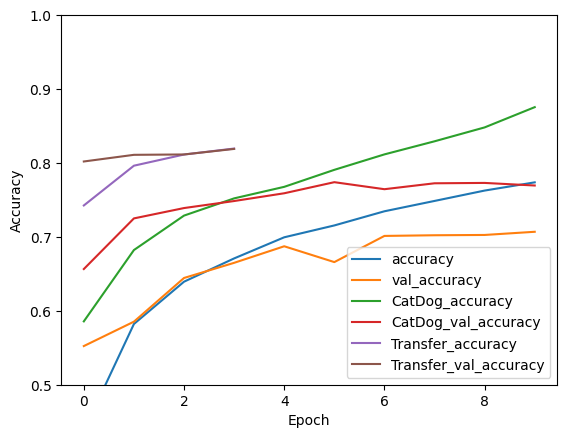

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(historyCatDog.history['accuracy'], label='CatDog_accuracy')
plt.plot(historyCatDog.history['val_accuracy'], label = 'CatDog_val_accuracy')
plt.plot(historyTransfer.history['accuracy'], label='Transfer_accuracy')
plt.plot(historyTransfer.history['val_accuracy'], label = 'Transfer_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)